# 비지도 학습(주성분 분석) 복습
---
**데이터셋**: HumanActivityRecognition
- train.csv
- test.csv

**다중 분류**(Multiclass Classification): **랜덤 포레스트**(Random Forest)

**주성분 분석**(PCA)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import myutils as my

### 데이터 준비 & 전처리
- train.csv

In [ ]:
# !gdown https://drive.google.com/uc?id=1ypa5iZ1dLDO-zGRO_yDXrJnMvjRGUG4v

Downloading...
From: https://drive.google.com/uc?id=1ypa5iZ1dLDO-zGRO_yDXrJnMvjRGUG4v
To: /content/HumanActivityRecognition.zip
100% 25.7M/25.7M [00:00<00:00, 86.4MB/s]


In [ ]:
!unzip HumanActivityRecognition.zip -d HumanActivityRecognition/

Archive:  HumanActivityRecognition.zip
  inflating: HumanActivityRecognition/test.csv  
  inflating: HumanActivityRecognition/train.csv  


In [ ]:
train = pd.read_csv('./HumanActivityRecognition/train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
X_train = train.drop(['Activity'], axis=1)
y_train = train['Activity']

### 라벨 인코딩(Label Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

### 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### 차원 축소
- 주성분 분석(PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300)
X_train = pca.fit_transform(X_train)

In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 베스트 모델 찾기
- **하이퍼파라미터 최적화**: 그리드 서치(GridSearchCV)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(10, 16, 1)
}

clf = RandomForestClassifier(random_state=42)

gs = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, cv=3, verbose=3)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 16),
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=3)

In [ ]:
gs.best_params_

{'max_depth': 14, 'n_estimators': 150}

In [ ]:
gs.best_score_

0.8509258750419791

### 학습
- **다중 분류**(Multiclass Classification): **랜덤 포레스트**(Random Forest)

In [ ]:
clf = RandomForestClassifier(n_estimators=150, max_depth=14, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=150, random_state=42)

### 평가

In [ ]:
clf.score(X_train, y_train)

0.999183895538629

### 예측
- test.csv

In [ ]:
test = pd.read_csv('./HumanActivityRecognition/test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [ ]:
X_test = test.drop(['Activity'], axis=1)
y_test = test['Activity']

In [ ]:
X_test = scaler.transform(X_test) # 표준화
X_test = pca.transform(X_test) # 차원 축소

y_test = le.transform(y_test) # 라벨 인코딩

In [ ]:
print(type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 2, ..., 5, 5, 3])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.8751272480488632
precision: 0.8807869085306764
recall: 0.8694245888313495


- **혼동 행렬**(confusion matrix)

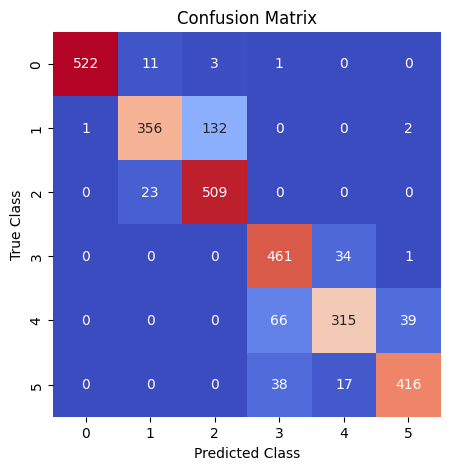

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)